# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

609

## Perform API Calls

In [3]:
# Starting URL for Weather Map API Call
#url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f2e7be3fbf6a6ca5ee22f83c7998246c"

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
        
        

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | imbituba
Processing Record 2 of Set 1 | bugiri
Processing Record 3 of Set 1 | bredasdorp
Processing Record 4 of Set 1 | tungkang
City not found. Skipping...
Processing Record 5 of Set 1 | muriwai beach
Processing Record 6 of Set 1 | ilulissat
Processing Record 7 of Set 1 | hermanus
Processing Record 8 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 9 of Set 1 | ixtapa
Processing Record 10 of Set 1 | rungata
City not found. Skipping...
Processing Record 11 of Set 1 | victoria
Processing Record 12 of Set 1 | balabac
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | gorontalo
Processing Record 15 of Set 1 | broome
Processing Record 16 of Set 1 | yellowknife
Processing Record 17 of Set 1 | mitu
Processing Record 18 of Set 1 | ballangen
Processing Record 19 of Set 1 | turukhansk
Processing Record 20 of Set 1 | ust-ilimsk
Processing Record 21 of Set 1 | s

Processing Record 41 of Set 4 | vila franca do campo
Processing Record 42 of Set 4 | beringovskiy
Processing Record 43 of Set 4 | baturaja
Processing Record 44 of Set 4 | narsaq
Processing Record 45 of Set 4 | mayo
Processing Record 46 of Set 4 | zhezkazgan
Processing Record 47 of Set 4 | bafoulabe
Processing Record 48 of Set 4 | huarmey
Processing Record 49 of Set 4 | westport
Processing Record 0 of Set 5 | ayan
Processing Record 1 of Set 5 | alexandria
Processing Record 2 of Set 5 | san cristobal
Processing Record 3 of Set 5 | carballo
Processing Record 4 of Set 5 | brae
Processing Record 5 of Set 5 | saldanha
Processing Record 6 of Set 5 | batagay
Processing Record 7 of Set 5 | yulara
Processing Record 8 of Set 5 | svetlaya
Processing Record 9 of Set 5 | guanica
Processing Record 10 of Set 5 | abha
Processing Record 11 of Set 5 | lata
Processing Record 12 of Set 5 | saint-felix-de-valois
Processing Record 13 of Set 5 | palabuhanratu
City not found. Skipping...
Processing Record 14 o

Processing Record 27 of Set 8 | khor
Processing Record 28 of Set 8 | ponta delgada
Processing Record 29 of Set 8 | markova
Processing Record 30 of Set 8 | matameye
City not found. Skipping...
Processing Record 31 of Set 8 | ambilobe
Processing Record 32 of Set 8 | tokzar
City not found. Skipping...
Processing Record 33 of Set 8 | linshu
City not found. Skipping...
Processing Record 34 of Set 8 | comodoro rivadavia
Processing Record 35 of Set 8 | kapuskasing
Processing Record 36 of Set 8 | walvis bay
Processing Record 37 of Set 8 | yeniseysk
Processing Record 38 of Set 8 | oranjestad
Processing Record 39 of Set 8 | huaiyin
Processing Record 40 of Set 8 | leninskoye
Processing Record 41 of Set 8 | salalah
Processing Record 42 of Set 8 | gbarnga
Processing Record 43 of Set 8 | vasylivka
Processing Record 44 of Set 8 | luba
Processing Record 45 of Set 8 | umm lajj
Processing Record 46 of Set 8 | concarneau
Processing Record 47 of Set 8 | kosh
Processing Record 48 of Set 8 | kalangala
Proce

Processing Record 22 of Set 12 | lixourion
Processing Record 23 of Set 12 | kayerkan
Processing Record 24 of Set 12 | bara
Processing Record 25 of Set 12 | mattru
Processing Record 26 of Set 12 | mehran
Processing Record 27 of Set 12 | las vegas
Processing Record 28 of Set 12 | palma
Processing Record 29 of Set 12 | zabid
Processing Record 30 of Set 12 | maicao
Processing Record 31 of Set 12 | madang
Processing Record 32 of Set 12 | gubkinskiy
Processing Record 33 of Set 12 | ningbo
Processing Record 34 of Set 12 | never
Processing Record 35 of Set 12 | hasanabad
Processing Record 36 of Set 12 | plettenberg bay
Processing Record 37 of Set 12 | aden
Processing Record 38 of Set 12 | zhuhai
Processing Record 39 of Set 12 | clinton
Processing Record 40 of Set 12 | letka
Processing Record 41 of Set 12 | maraba
Processing Record 42 of Set 12 | teeli
Processing Record 43 of Set 12 | pangnirtung
Processing Record 44 of Set 12 | pingliang
Processing Record 45 of Set 12 | kuche
City not found. S

In [4]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)

# Show Record Count
city_data_pd.count()

City          566
Lat           566
Lng           566
Max Temp      566
Humidity      566
Cloudiness    566
Wind Speed    566
Country       566
Date          566
dtype: int64

In [5]:
# Display the City Data Frame
city_data_pd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,imbituba,-28.24,-48.67,82.40,61,20,10.29,BR,1605364003
1,bugiri,0.57,33.74,75.81,78,73,4.65,UG,1605364003
2,bredasdorp,-34.53,20.04,64.40,59,100,19.46,ZA,1605364003
3,muriwai beach,-36.82,174.45,54.00,93,0,4.18,NZ,1605364004
4,ilulissat,69.22,-51.10,12.20,66,75,24.16,GL,1605364004


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
city_data_pd.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,5.660000e+02
mean,21.829823,17.959364,57.137191,72.279152,47.496466,8.242032,1.605364e+09
std,32.466008,88.839908,26.827297,19.996544,39.393488,5.426107,5.996117e+01
min,-54.800000,-179.170000,-25.600000,8.000000,0.000000,0.380000,1.605364e+09
25%,-4.372500,-63.017500,37.082500,63.000000,1.000000,4.365000,1.605364e+09
50%,28.000000,22.690000,64.400000,76.000000,40.500000,6.930000,1.605364e+09
75%,48.460000,95.695000,79.075000,87.000000,90.000000,11.397500,1.605364e+09
max,78.220000,179.320000,97.840000,100.000000,100.000000,35.570000,1.605364e+09


In [7]:
#  Get the indices of cities that have humidity over 100%.
dirty_city_data = city_data_pd[(city_data_pd["Humidity"] > 100)].index
                                  
dirty_city_data

Int64Index([], dtype='int64')

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_data_pd.drop(dirty_city_data, inplace=False)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,imbituba,-28.24,-48.67,82.40,61,20,10.29,BR,1605364003
1,bugiri,0.57,33.74,75.81,78,73,4.65,UG,1605364003
2,bredasdorp,-34.53,20.04,64.40,59,100,19.46,ZA,1605364003
3,muriwai beach,-36.82,174.45,54.00,93,0,4.18,NZ,1605364004
4,ilulissat,69.22,-51.10,12.20,66,75,24.16,GL,1605364004


In [9]:
# Extract relevant fields from the data frame
lats = clean_city_data["Lat"]
max_temps = clean_city_data["Max Temp"]
humidity = clean_city_data["Humidity"]
cloudiness = clean_city_data["Cloudiness"]
wind_speed = clean_city_data["Wind Speed"]

# Export the City_Data into a csv
clean_city_data.to_csv(output_data_file, index_label="City_ID")

## Latitude vs. Temperature Plot

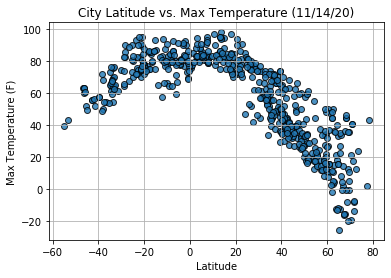

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats, 
            max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

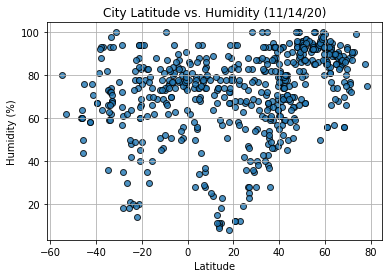

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

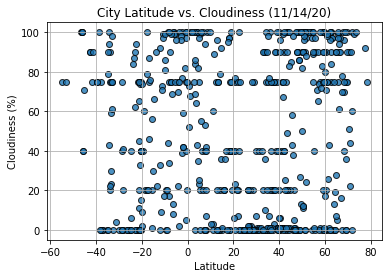

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats, 
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

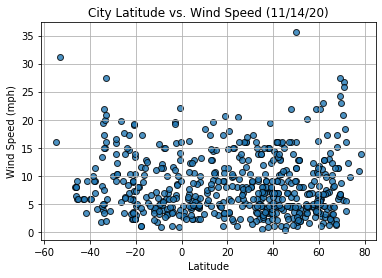

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

## Linear Regression

In [14]:
# Create a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Run regresson on southern hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [15]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_pd.loc[(city_data_pd["Lat"] >= 0)]
southern_hemi_df = city_data_pd.loc[(city_data_pd["Lat"] < 0)]

###  Max Temp vs. Latitude Linear Regression

The r-value is: 0.767877969462491


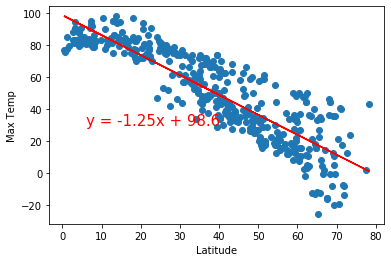

In [16]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp',(6,30))

The r-value is: 0.40301987328815225


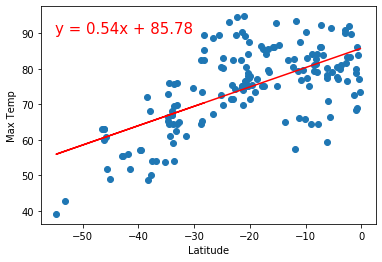

In [17]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp', (-55, 90))

The high r value indicates a strong positive correlation between latitude and max temperature. R values ~ 0.5 indicate that there is a moderate positive correlation. 

### Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.18300006144386644


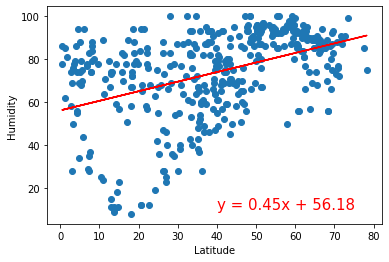

In [18]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity',(40,10))

The r-value is: 0.020641961333525794


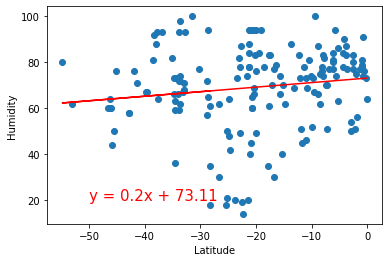

In [19]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (-50, 20))

The low r values indicate a weak to no relationship between humidity and latitude.

### Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.03384510161403793


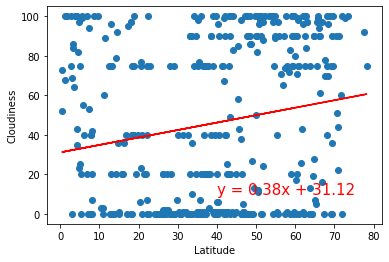

In [20]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (40,10))

The r-value is: 0.004895722169754255


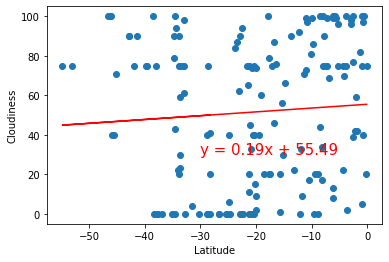

In [21]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (-30,30))

The low r values indicate a weak positive relationship between latitude and cloudiness.

### Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.006728549423062253


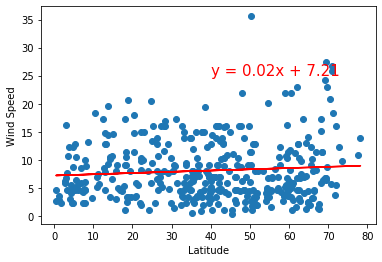

In [22]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (40,25))

The r-value is: 0.02799436199805614


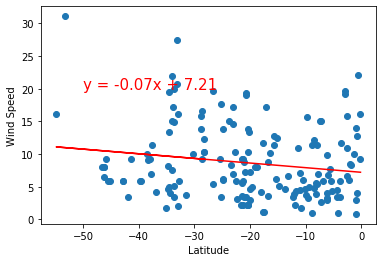

In [23]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (-50, 20))

The low r values indicate that there is no real relationship between wind speed and latitude." The difference between the hemispheres doesn't seem to be significant enough to comment upon.